In [1]:
import numpy as np 
import pandas as pd
import os
import csv
import cv2 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('HAM10000_metadata.csv')

In [3]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

labels = data['dx']

encoded_labels = label_encoder.fit_transform(labels)




In [5]:
set(label_encoder.inverse_transform(encoded_labels))

{'akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'}

In [6]:
labels = pd.DataFrame(encoded_labels)

In [7]:
labels.value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
dtype: int64

In [8]:
new_data=pd.concat([data,labels],axis=1)

In [9]:
new_data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [10]:
new_data[new_data[0]==6]

,lesion_id,image_id,dx,dx_type,age,sex,localization,0
2320,HAM_0006889,ISIC_0031197,vasc,histo,20.0,male,upper extremity,6
2321,HAM_0006889,ISIC_0031270,vasc,histo,20.0,male,upper extremity,6
2322,HAM_0001920,ISIC_0029486,vasc,histo,55.0,male,back,6
2323,HAM_0001920,ISIC_0031901,vasc,histo,55.0,male,back,6
2324,HAM_0005155,ISIC_0032076,vasc,histo,85.0,male,lower extremity,6
...,...,...,...,...,...,...,...,...
2457,HAM_0000415,ISIC_0025680,vasc,consensus,55.0,female,trunk,6
2458,HAM_0004413,ISIC_0026068,vasc,consensus,55.0,female,abdomen,6
2459,HAM_0004257,ISIC_0025452,vasc,consensus,55.0,female,abdomen,6
2460,HAM_0003829,ISIC_0026349,vasc,consensus,60.0,female,trunk,6


In [11]:
df_0 = new_data[new_data[0]==0]

In [12]:
df_1 = new_data[new_data[0]==1]

In [13]:
df_2 = new_data[new_data[0]==2]

In [14]:
df_3 = new_data[new_data[0]==3]

In [15]:
df_4 = new_data[new_data[0]==4]

In [16]:
df_5 = new_data[new_data[0]==5]

In [17]:
df_6 = new_data[new_data[0]==6]

In [18]:
from sklearn.utils import resample

In [19]:
n_samples = 500

In [20]:
df_0_b = resample(df_0,replace=True,n_samples=n_samples,random_state = 42)
df_0_b.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,0
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0


In [21]:
df_1_b = resample(df_1,replace=True,n_samples=n_samples,random_state = 42)
df_1_b.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,0
2564,HAM_0001907,ISIC_0025513,bcc,histo,40.0,male,back,1
2897,HAM_0006904,ISIC_0027281,bcc,histo,70.0,male,back,1
2732,HAM_0004027,ISIC_0024595,bcc,histo,65.0,female,back,1
2568,HAM_0006384,ISIC_0031272,bcc,histo,80.0,male,face,1
2533,HAM_0005921,ISIC_0030800,bcc,histo,75.0,male,lower extremity,1


In [22]:
df_2_b = resample(df_2,replace=True,n_samples=n_samples,random_state = 42)
df_2_b.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,0
861,HAM_0005580,ISIC_0029235,bkl,consensus,80.0,male,face,2
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,2
1045,HAM_0005751,ISIC_0028386,bkl,consensus,50.0,female,upper extremity,2
122,HAM_0000344,ISIC_0032972,bkl,histo,55.0,male,trunk,2
467,HAM_0005935,ISIC_0026679,bkl,histo,70.0,female,chest,2


In [23]:
df_3_b = resample(df_3,replace=True,n_samples=n_samples,random_state = 42)
df_3_b.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,0
1197,HAM_0004065,ISIC_0026629,df,consensus,65.0,female,lower extremity,3
1146,HAM_0005861,ISIC_0028346,df,histo,65.0,female,lower extremity,3
1187,HAM_0006787,ISIC_0026471,df,consensus,60.0,male,lower extremity,3
1109,HAM_0005518,ISIC_0032410,df,histo,30.0,male,lower extremity,3
1201,HAM_0000049,ISIC_0029130,df,consensus,70.0,male,lower extremity,3


In [24]:
df_4_b = resample(df_4,replace=True,n_samples=n_samples,random_state = 42)
df_4_b.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,0
2071,HAM_0002523,ISIC_0024516,mel,histo,40.0,male,back,4
2306,HAM_0001910,ISIC_0028968,mel,histo,55.0,male,upper extremity,4
2255,HAM_0001953,ISIC_0031498,mel,histo,65.0,male,back,4
1332,HAM_0005588,ISIC_0026458,mel,histo,80.0,female,lower extremity,4
1677,HAM_0007086,ISIC_0033863,mel,histo,65.0,female,back,4


In [25]:
df_5_b = resample(df_5,replace=True,n_samples=n_samples,random_state = 42)
df_5_b.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,0
3835,HAM_0000474,ISIC_0030099,nv,follow_up,45.0,female,hand,5
8367,HAM_0000597,ISIC_0030654,nv,histo,35.0,female,abdomen,5
8203,HAM_0007585,ISIC_0032347,nv,histo,35.0,female,back,5
8168,HAM_0005902,ISIC_0027285,nv,histo,40.0,female,foot,5
6747,HAM_0004380,ISIC_0026251,nv,histo,30.0,female,face,5


In [26]:
df_6_b = resample(df_6,replace=True,n_samples=n_samples,random_state = 42)
df_6_b.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,0
2422,HAM_0006796,ISIC_0025707,vasc,consensus,35.0,male,trunk,6
2412,HAM_0000934,ISIC_0031706,vasc,consensus,60.0,male,trunk,6
2334,HAM_0002218,ISIC_0025578,vasc,histo,5.0,male,back,6
2426,HAM_0005215,ISIC_0028406,vasc,consensus,80.0,male,abdomen,6
2391,HAM_0001566,ISIC_0031346,vasc,consensus,70.0,female,face,6


In [27]:
data = pd.concat([df_0_b,df_1_b,df_2_b,df_3_b,df_4_b,df_5_b,df_6_b])

In [28]:
data['dx'].value_counts()

akiec    500
bcc      500
bkl      500
df       500
mel      500
nv       500
vasc     500
Name: dx, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
image_id = data['image_id']
img_class = data['dx']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(image_id, img_class, test_size=0.2, random_state=42)


In [32]:
image_folder = r'C:\Users\bathu\HAM_data'

In [33]:
def load_image(image_id):
    image_path = os.path.join(image_folder, str(image_id) + '.jpg')
    image = mpimg.imread(image_path)
    return image

def img_preprocess(img):
    img = cv2.resize(img, (150, 150))
    img = img / 255
    return img

image_data = []
for image_id in X_train:
    image_id = image_id.strip()  
    image = load_image(image_id)
    preprocessed_image = img_preprocess(image)
    image_data.append(preprocessed_image)


In [34]:
val_image_data = []
for image_id in X_test:
    image_id = image_id.strip()  
    image = load_image(image_id)
    preprocessed_image = img_preprocess(image)
    val_image_data.append(preprocessed_image)



In [35]:
training_data = np.array(image_data)

In [36]:
validation_data=np.array(val_image_data)

In [37]:
training_data.shape

(2800, 150, 150, 3)

In [38]:
import pandas as pd
one_hot_labels_train = pd.get_dummies(y_train)


In [39]:
one_hot_labels_train

,akiec,bcc,bkl,df,mel,nv,vasc
9911,1,0,0,0,0,0,0
7100,0,0,1,0,0,0,0
1183,0,0,0,1,0,0,0
122,0,0,1,0,0,0,0
879,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
407,0,0,1,0,0,0,0
1052,0,0,1,0,0,0,0
314,0,0,1,0,0,0,0
2858,0,1,0,0,0,0,0


In [40]:
one_hot_labels_test = pd.get_dummies(y_test)


In [41]:
one_hot_labels_test

,akiec,bcc,bkl,df,mel,nv,vasc
1142,0,0,0,1,0,0,0
1702,0,0,0,0,1,0,0
1237,0,0,0,0,1,0,0
1161,0,0,0,1,0,0,0
9874,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2347,0,0,0,0,0,0,1
2681,0,1,0,0,0,0,0
2917,0,1,0,0,0,0,0
1133,0,0,0,1,0,0,0


In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,Add
from tensorflow.keras.layers import SeparableConv2D,ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten





model = Sequential()
model.add(Conv2D(256,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 256)     7168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 256)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 256)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       295040    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 36, 36, 128)      

In [46]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])


In [47]:
history = model.fit(training_data,one_hot_labels_train,epochs=30,validation_data=(validation_data,one_hot_labels_test),batch_size=100,verbose=1,shuffle=1)

Epoch 1/30
28/28 [==============================] - 226s 8s/step - loss: 2.0910 - accuracy: 0.1561 - val_loss: 1.9477 - val_accuracy: 0.1271
Epoch 2/30
28/28 [==============================] - 232s 8s/step - loss: 1.9251 - accuracy: 0.1979 - val_loss: 1.8522 - val_accuracy: 0.2514
Epoch 3/30
28/28 [==============================] - 234s 8s/step - loss: 1.8335 - accuracy: 0.2382 - val_loss: 1.8200 - val_accuracy: 0.2600
Epoch 4/30
28/28 [==============================] - 243s 9s/step - loss: 1.7241 - accuracy: 0.2739 - val_loss: 1.7019 - val_accuracy: 0.2629
Epoch 5/30
28/28 [==============================] - 241s 8s/step - loss: 1.7048 - accuracy: 0.3007 - val_loss: 1.7604 - val_accuracy: 0.2686
Epoch 6/30
28/28 [==============================] - 233s 8s/step - loss: 1.6533 - accuracy: 0.3268 - val_loss: 1.6896 - val_accuracy: 0.3300
Epoch 7/30
28/28 [==============================] - 251s 9s/step - loss: 1.5720 - accuracy: 0.3771 - val_loss: 1.6436 - val_accuracy: 0.3571
Epoch 8/30
28

In [49]:
history = model.fit(training_data,one_hot_labels_train,epochs=50,validation_data=(validation_data,one_hot_labels_test),batch_size=100,verbose=1,shuffle=1)

Epoch 1/50
28/28 [==============================] - 185s 7s/step - loss: 0.6124 - accuracy: 0.7768 - val_loss: 1.1528 - val_accuracy: 0.6471
Epoch 2/50
28/28 [==============================] - 139s 5s/step - loss: 0.6385 - accuracy: 0.7657 - val_loss: 1.0413 - val_accuracy: 0.7029
Epoch 3/50
28/28 [==============================] - 152s 5s/step - loss: 0.5842 - accuracy: 0.7889 - val_loss: 1.0479 - val_accuracy: 0.6943
Epoch 4/50
28/28 [==============================] - 169s 6s/step - loss: 0.5707 - accuracy: 0.8004 - val_loss: 1.0325 - val_accuracy: 0.7057
Epoch 5/50
28/28 [==============================] - 179s 6s/step - loss: 0.5764 - accuracy: 0.7939 - val_loss: 1.1951 - val_accuracy: 0.6471
Epoch 6/50
28/28 [==============================] - 164s 6s/step - loss: 0.5374 - accuracy: 0.8154 - val_loss: 1.0627 - val_accuracy: 0.6714
Epoch 7/50
28/28 [==============================] - 153s 5s/step - loss: 0.5107 - accuracy: 0.8146 - val_loss: 1.1584 - val_accuracy: 0.6943
Epoch 8/50
28

Text(0.5, 0, 'Epoch')

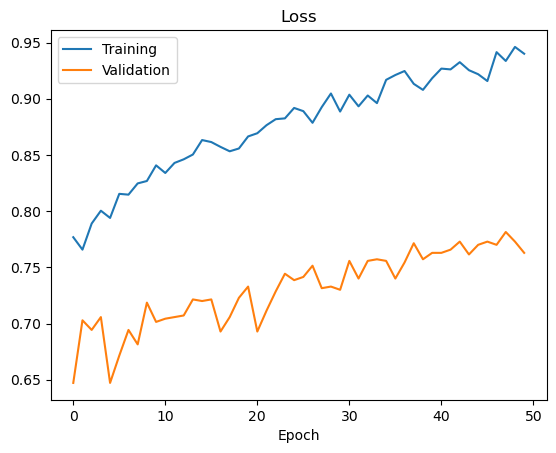

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

validation accuracy is about 76% with the above architecture which is pretty good considering that we have only 500 images for each class. 